In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [3]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [4]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [5]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [6]:
df_train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [7]:
df_test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [8]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
df_test[df_test.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary


In [11]:
df_train[df_train.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [12]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [13]:
df_train['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

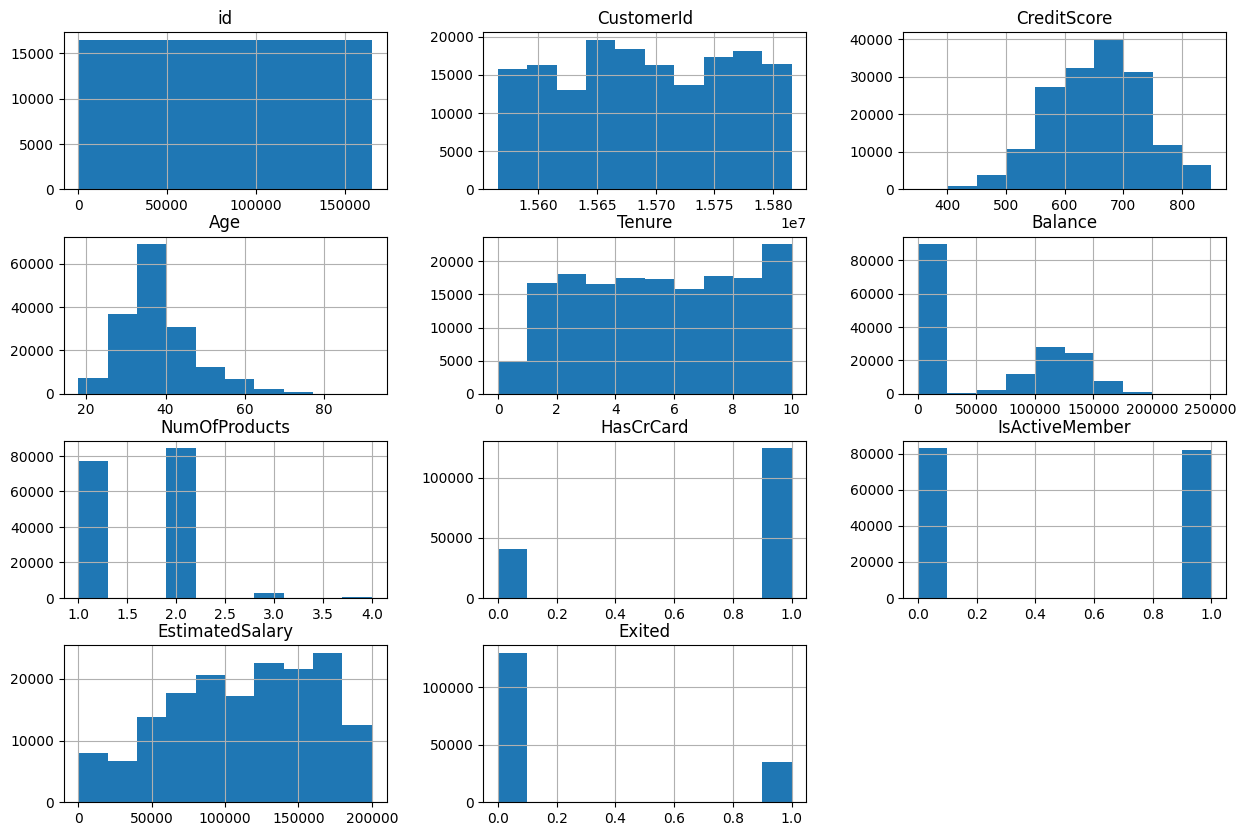

In [14]:
df_train.hist(figsize=(15,10))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

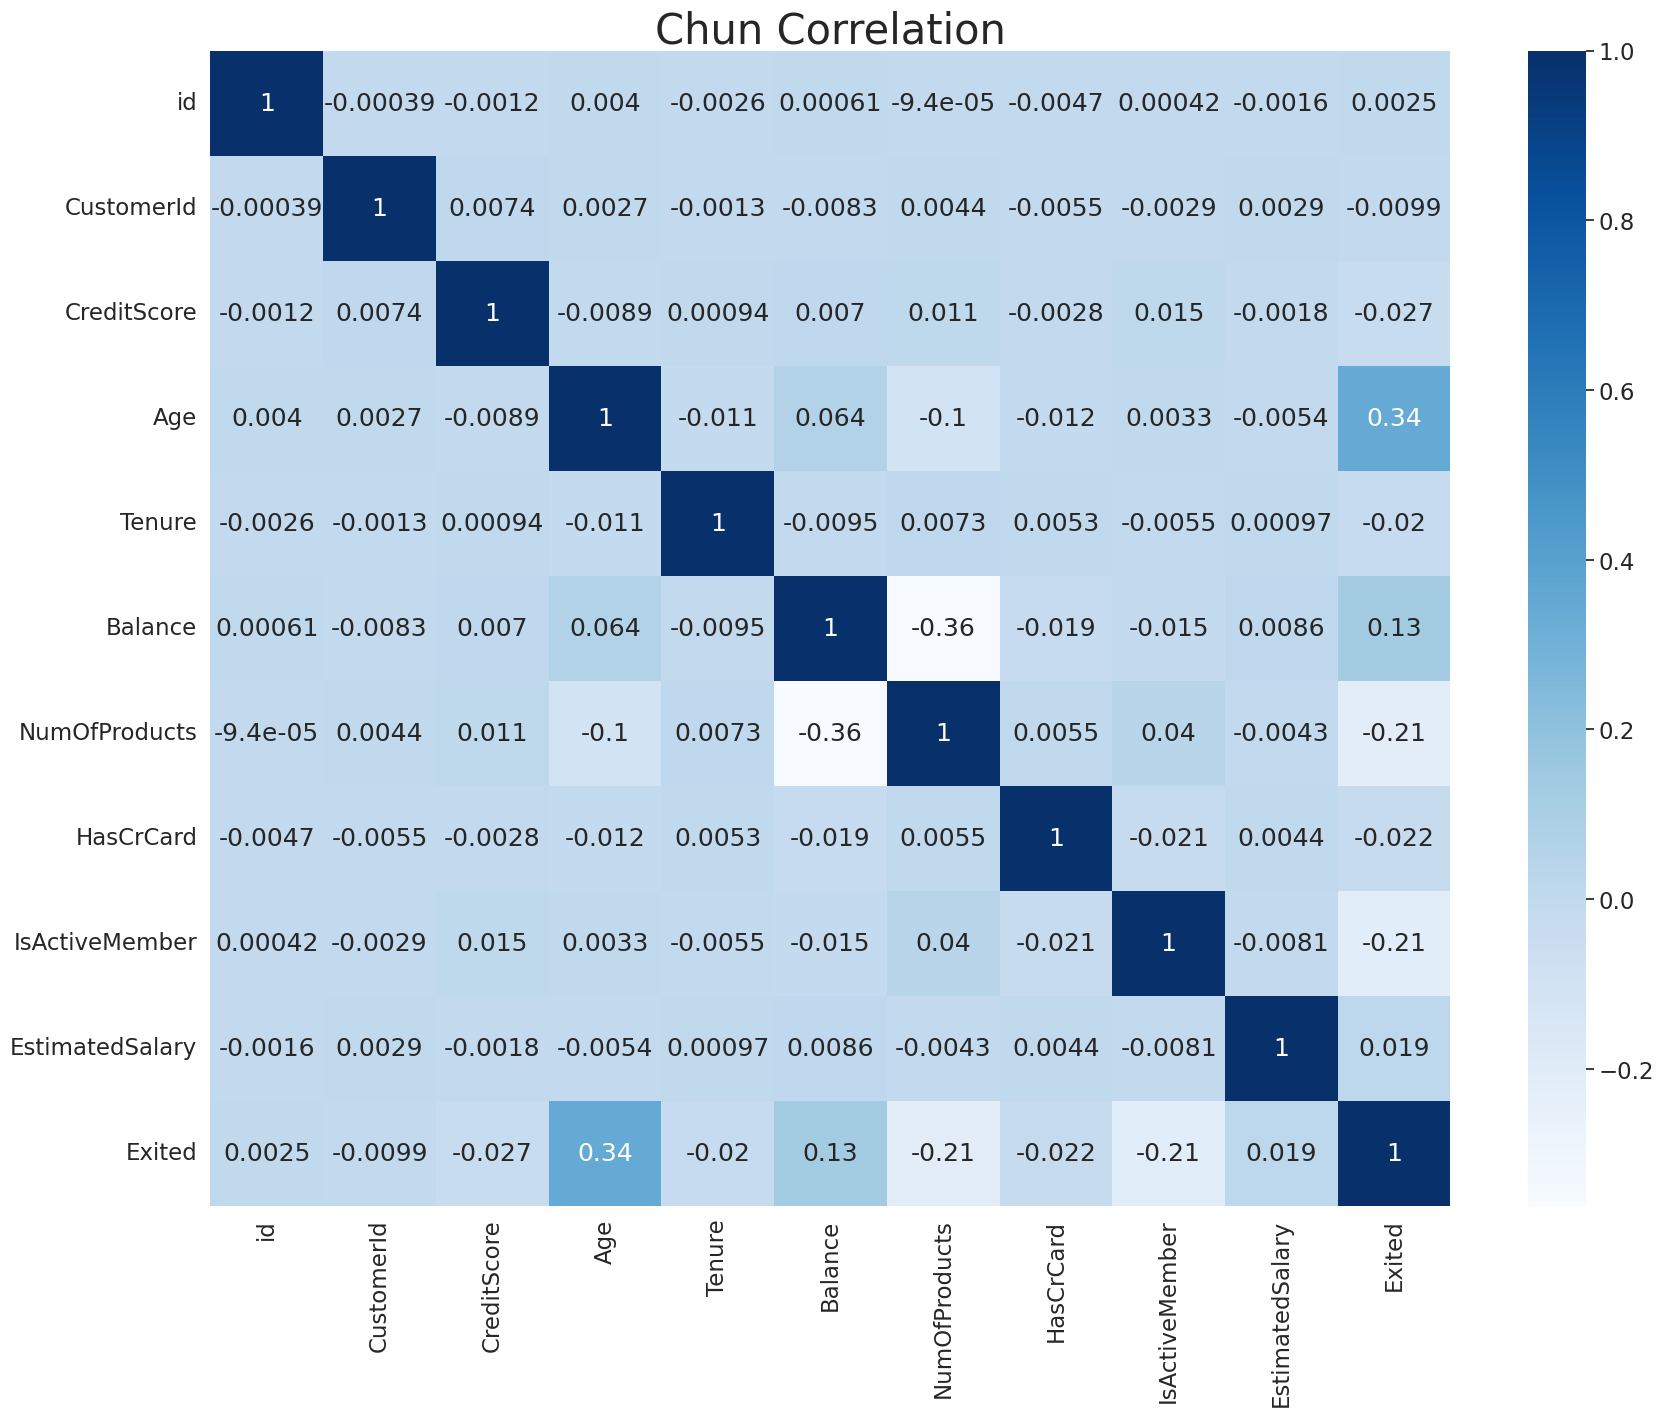

In [15]:
df_train.corr(numeric_only=True)
plt.figure(figsize = (20,15))
sns.set(font_scale=1.5)
sns.heatmap(df_train.corr(numeric_only=True),annot=True, cmap='Blues')
plt.title("Chun Correlation",fontsize=30)
plt.show

In [16]:
corr = df_train.corrwith(df_train.Exited,numeric_only=True)
corr = pd.DataFrame(corr)


<Axes: >

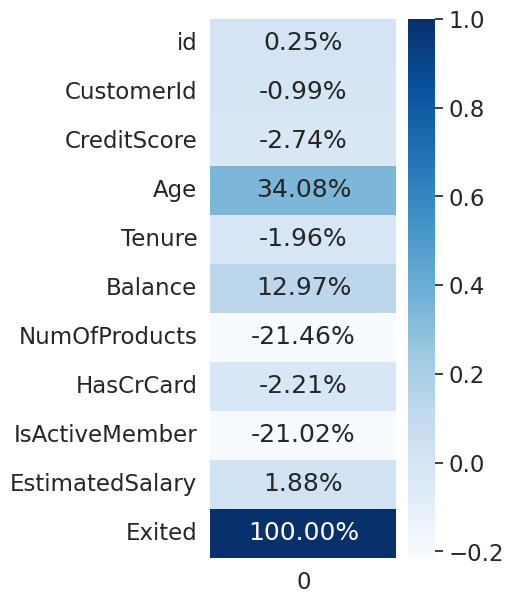

In [17]:
plt.figure(figsize=(3,7))
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2%')

EDA

In [18]:
df_train['Exited_str'] = df_train['Exited'].replace([0,1],['No','Yes'])

In [19]:
df_train['Hascrcard_str'] = df_train['HasCrCard'].replace([0,1],['No','Yes'])
df_train['Isactive_str'] = df_train['IsActiveMember'].replace([0,1],['No','Yes'])

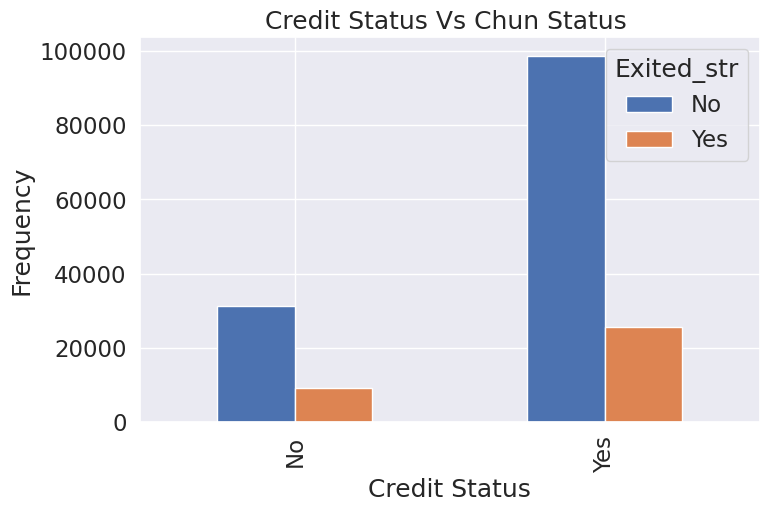

In [20]:
pd.crosstab(df_train.Hascrcard_str,df_train.Exited_str).plot(kind='bar',figsize=(8,5) )
plt.title('Credit Status Vs Chun Status ')
plt.xlabel('Credit Status')
plt.ylabel('Frequency')
plt.show()

In [21]:
(df_train.groupby('Exited_str')['Hascrcard_str'].value_counts()/df_train.groupby('Exited_str')['Hascrcard_str'].count()).round(3)*100

Exited_str  Hascrcard_str
No          Yes              75.9
            No               24.1
Yes         Yes              73.6
            No               26.4
dtype: float64

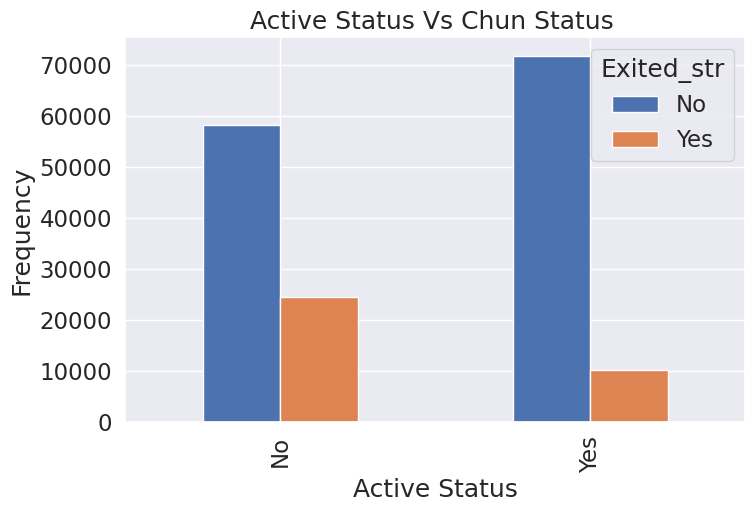

In [22]:
pd.crosstab(df_train.Isactive_str,df_train.Exited_str).plot(kind='bar',figsize=(8,5) )
plt.title('Active Status Vs Chun Status ')
plt.xlabel('Active Status')
plt.ylabel('Frequency')
plt.show()

In [23]:
(df_train.groupby('Exited_str')['Isactive_str'].value_counts()/df_train.groupby('Exited_str')['Isactive_str'].count()).round(3)*100

Exited_str  Isactive_str
No          Yes             55.2
            No              44.8
Yes         No              70.5
            Yes             29.5
dtype: float64

In [24]:
df_train_no = df_train[df_train['Exited'] == 0]
df_train_yes = df_train[df_train['Exited'] == 1]
df_train_no_age = df_train_no['Age']
df_train_yes_age= df_train_yes['Age']

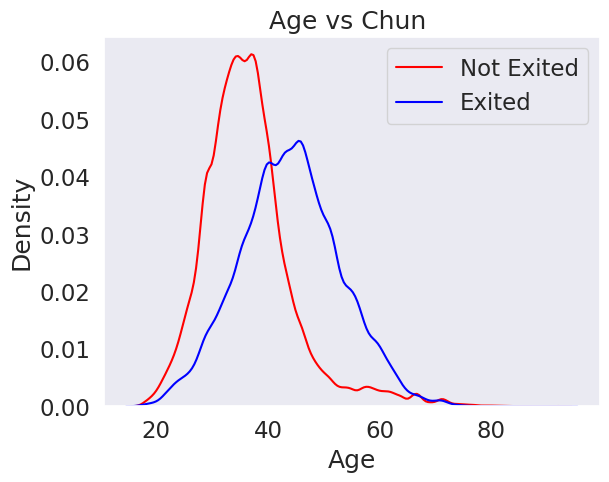

In [25]:
sns.kdeplot(df_train_no_age,color='red')
sns.kdeplot(df_train_yes_age,color='blue')
plt.grid()
plt.title('Age vs Chun ')
plt.legend(['Not Exited' , 'Exited'])
plt.show()

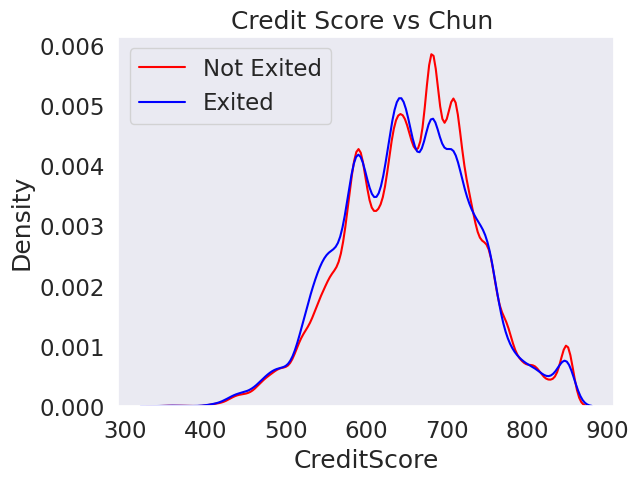

In [26]:
df_train_no_cre = df_train_no['CreditScore']
df_train_yes_cre= df_train_yes['CreditScore']

sns.kdeplot(df_train_no_cre,color='red')
sns.kdeplot(df_train_yes_cre,color='blue')
plt.grid()
plt.title('Credit Score vs Chun ')
plt.legend(['Not Exited' , 'Exited'])

plt.show()

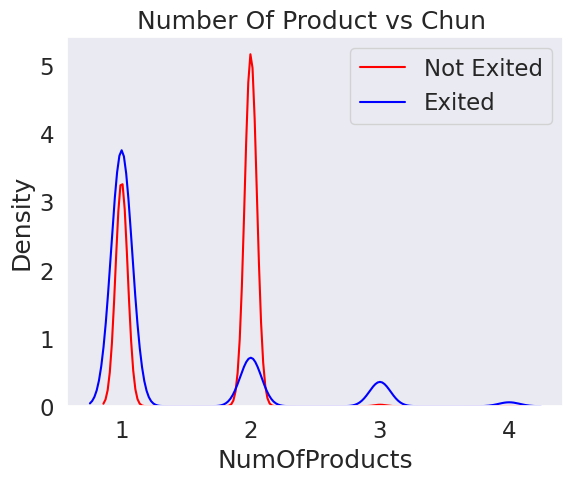

In [27]:
df_train_no_num = df_train_no['NumOfProducts']
df_train_yes_num= df_train_yes['NumOfProducts']
sns.kdeplot(df_train_no_num,color='red')
sns.kdeplot(df_train_yes_num,color='blue')
plt.grid()
plt.title('Number Of Product vs Chun ')
plt.legend(['Not Exited' , 'Exited'])

plt.show()

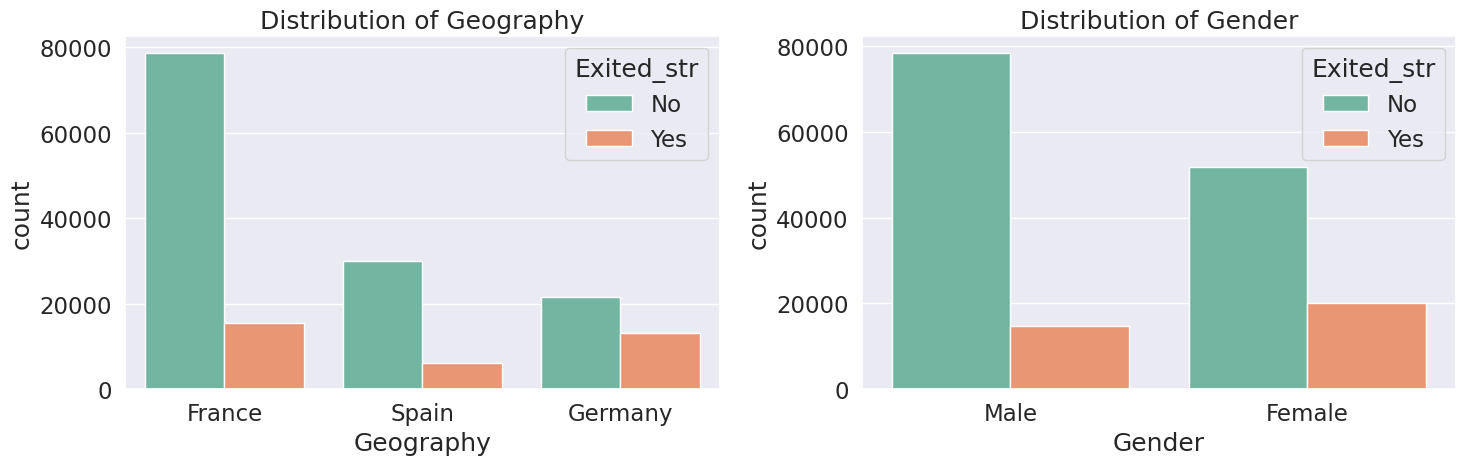

In [28]:
categorical_columns = ['Geography', 'Gender']

# rows of subplots
num_rows = len(categorical_columns) // 2 + len(categorical_columns) % 2

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(data=df_train, x=column, hue='Exited_str', palette='Set2') 
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [29]:
## Goegraphy distribution 
(df_train.groupby('Exited_str')['Geography'].value_counts()/df_train.groupby('Exited_str')['Geography'].count()).round(3)*100

Exited_str  Geography
No          France       60.4
            Spain        23.0
            Germany      16.5
Yes         France       44.6
            Germany      37.6
            Spain        17.9
dtype: float64

In [30]:
## Gender distribution
(df_train.groupby('Exited_str')['Gender'].value_counts()/df_train.groupby('Exited_str')['Gender'].count()).round(3)*100

Exited_str  Gender
No          Male      60.2
            Female    39.8
Yes         Female    57.6
            Male      42.4
dtype: float64

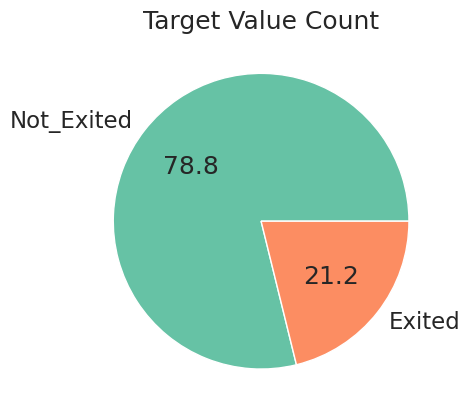

In [31]:
labels = ('Not_Exited','Exited')
plt.pie(df_train.Exited_str.value_counts(),labels = labels,autopct='%.1f',colors=sns.color_palette('Set2'))  
plt.title('Target Value Count')
plt.show()

Feature Engineering And Selection 
Drop the created strings columns 

In [32]:
column = ['Isactive_str','Hascrcard_str','Exited_str']
df_train.drop(column,axis=1,inplace=True)
#df_train

In [33]:
X = df_train.drop(['Exited','Surname','id','CustomerId'],axis=1)
y = df_train.Exited

In [34]:
X.shape, y.shape

((165034, 10), (165034,))

In [35]:
## Preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [36]:
lb = LabelEncoder()

X['Gender'] = lb.fit_transform(X['Gender'])
df_test['Gender'] = lb.transform(df_test['Gender'])
X.head(5).T


,0,1,2,3,4
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,1,1,1,1,1
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2
HasCrCard,1.0,1.0,1.0,1.0,1.0
IsActiveMember,0.0,1.0,0.0,1.0,1.0
EstimatedSalary,181449.97,49503.5,184866.69,84560.88,15068.83


In [37]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'X' and 'df_test' are your DataFrames
hot = OneHotEncoder()

# Apply OneHotEncoder to 'Geography' in the training set
X_geography_encoded = hot.fit_transform(X[['Geography']])

# Apply OneHotEncoder to 'Geography' in the testing set
df_test_geography_encoded = hot.transform(df_test[['Geography']])

# Concatenate the one-hot encoded columns to the original DataFrames
X = pd.concat([X, pd.DataFrame(X_geography_encoded.toarray(), columns=hot.get_feature_names_out(['Geography']))], axis=1)
df_test = pd.concat([df_test, pd.DataFrame(df_test_geography_encoded.toarray(), columns=hot.get_feature_names_out(['Geography']))], axis=1)

# Drop the original 'Geography' column
X.drop(['Geography'], axis=1, inplace=True)
df_test.drop(['Geography'], axis=1, inplace=True)

# Display the updated DataFrames
print(pd.DataFrame(X.head()))
print(pd.DataFrame(df_test.head()))

   CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668       1  33.0       3       0.00              2        1.0   
1          627       1  33.0       1       0.00              2        1.0   
2          678       1  40.0      10       0.00              2        1.0   
3          581       1  34.0       2  148882.54              1        1.0   
4          716       1  33.0       5       0.00              2        1.0   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0             0.0        181449.97               1.0                0.0   
1             1.0         49503.50               1.0                0.0   
2             0.0        184866.69               1.0                0.0   
3             1.0         84560.88               1.0                0.0   
4             1.0         15068.83               0.0                0.0   

   Geography_Spain  
0              0.0  
1              0.0  
2              0.0  
3 

In [38]:

pd.DataFrame(df_test)

,id,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,165034,15773898,Lucchese,586,0,23.0,2,0.00,2,0.0,1.0,160976.75,1.0,0.0,0.0
1,165035,15782418,Nott,683,0,46.0,2,0.00,1,1.0,0.0,72549.27,1.0,0.0,0.0
2,165036,15807120,K?,656,0,34.0,7,0.00,2,1.0,0.0,138882.09,1.0,0.0,0.0
3,165037,15808905,O'Donnell,681,1,36.0,8,0.00,1,1.0,0.0,113931.57,1.0,0.0,0.0
4,165038,15607314,Higgins,752,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,0.0,1.0
110019,275053,15774133,Cox,575,0,36.0,4,178032.53,1,1.0,1.0,42181.68,1.0,0.0,0.0
110020,275054,15728456,Ch'iu,712,1,31.0,2,0.00,2,1.0,0.0,16287.38,1.0,0.0,0.0
110021,275055,15687541,Yegorova,709,0,32.0,3,0.00,1,1.0,1.0,158816.58,1.0,0.0,0.0


In [39]:
pd.DataFrame(X)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,1.0,0.0,0.0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,1.0,0.0,0.0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,1.0,0.0,0.0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,1.0,0.0,0.0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0.0,0.0,1.0
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,1.0,0.0,0.0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,1.0,0.0,0.0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0.0,0.0,1.0


In [40]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss


In [41]:
##Balancing the dataset to prevent Bias 
nm = NearMiss(version = 1,n_neighbors=5)
x_sm,y_sm=nm.fit_resample(X,y)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.30, random_state=42, stratify=y_sm)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import * 

In [44]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [45]:

grid_models = [(KNeighborsClassifier(),[{'n_neighbors':[8,10,13],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','brute']}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy','log_loss'],'min_samples_leaf':[4,5,6],'max_depth':[8,10,13]}]), 
               (RandomForestClassifier(),[{'n_estimators':[50,100,150,200],'max_depth':[8,10,13],'criterion':['gini','entropy'],'max_features':[1,3,5]}]),
               (LogisticRegression(),[{'C':[1.0, 0.80, 0.70]}]),
               (XGBClassifier(), [{'learning_rate': [0.01,0.03,0.05], 'min_child_weight':[1,3,5], 'eval_metric':['error','auc']}])]

In [46]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

KNeighborsClassifier():
Best Accuracy : 80.73%
Best Parameters :  {'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance'}

----------------

DecisionTreeClassifier():
Best Accuracy : 90.27%
Best Parameters :  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}

----------------

RandomForestClassifier():
Best Accuracy : 90.84%
Best Parameters :  {'criterion': 'gini', 'max_depth': 13, 'max_features': 3, 'n_estimators': 100}

----------------

LogisticRegression():
Best Accuracy : 82.77%
Best Parameters :  {'C': 1.0}

----------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat

A

In [47]:
# Create and train the KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=8, weights='distance')
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)
report1 = classification_report(y_test, y_pred)


# Evaluate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
rec=recall_score(y_test,y_pred )
print(f"Type 2 Error:  {100-rec*100:.2f}%")
pre=precision_score(y_test,y_pred)

print(f"Type 1 Error : {100-pre*100:.2f}%")

accuracyy =accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracyy * 100:.2f}%")

print("Classification Report:\n", report1)

Confusion Matrix:
[[9884  593]
 [3183 7293]]
Type 2 Error:  30.38%
Type 1 Error : 7.52%
Accuracy: 81.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84     10477
           1       0.92      0.70      0.79     10476

    accuracy                           0.82     20953
   macro avg       0.84      0.82      0.82     20953
weighted avg       0.84      0.82      0.82     20953



**B** DecissionTree

In [48]:
# Create and train the DecissionTreeClassifier
dcc = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=6)
dcc.fit(X_train, y_train)

# Make predictions on the test set
pred2 = dcc.predict(X_test)
report = classification_report(y_test, pred2)
# Evaluate the confusion matrix
cm2 = confusion_matrix(y_test,pred2)
print("Confusion Matrix:")
print(cm2)
rec=recall_score(y_test,pred2 )
print(f"Type 2 Error:  {100-rec*100:.2f}")
pre=precision_score(y_test,pred2)

print(f"Type 1 Error : {100-pre*100:.2f}%")
accuracy1 = accuracy_score(y_test,pred2)

print(f"Accuracy: {accuracy1 * 100:.2f}%")

print("Classification Report:\n", report)

Confusion Matrix:
[[9706  771]
 [1242 9234]]
Type 2 Error:  11.86
Type 1 Error : 7.71%
Accuracy: 90.39%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     10477
           1       0.92      0.88      0.90     10476

    accuracy                           0.90     20953
   macro avg       0.90      0.90      0.90     20953
weighted avg       0.90      0.90      0.90     20953



**C** Random Forest 

In [49]:
modelforest = RandomForestClassifier(criterion='gini',max_features=5,max_depth=10,n_estimators=100)

modelforest.fit(X_train,y_train)
forestpred = modelforest.predict(X_test)
report2= classification_report(y_test,forestpred)
# Evaluate the confusion matrix
cot = confusion_matrix(y_test,forestpred)
print("Confusion Matrix:")
print(cot)

accuracy2 = accuracy_score(y_test,forestpred)
rec=recall_score(y_test,forestpred )
print(f"Type 2 Error:  {100-rec*100:.2f}%")
pre=precision_score(y_test,forestpred)

print(f"Type 1 Error : {100-pre*100:.2f}%")


print(f"Accuracy: {accuracy2 * 100:.2f}%")

print("Classification Report:\n", report2)

Confusion Matrix:
[[9665  812]
 [1053 9423]]
Type 2 Error:  10.05%
Type 1 Error : 7.93%
Accuracy: 91.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     10477
           1       0.92      0.90      0.91     10476

    accuracy                           0.91     20953
   macro avg       0.91      0.91      0.91     20953
weighted avg       0.91      0.91      0.91     20953



**D** LogisticRegression

In [50]:
log = LogisticRegression(C=1.0)
log.fit(X_train,y_train)
logpred = log.predict(X_test)
logx = classification_report(y_test,logpred)
accurracy3 = accuracy_score(y_test,logpred)
cot2 = confusion_matrix(y_test,logpred)

print(f"Accuracy score is : {accurracy3 * 100:.2f}%")
print("Confusion Matrix:")
rec=recall_score(y_test,logpred )
print(f"Type 2 Error:  {100-rec*100:.2f}%")
pre=precision_score(y_test,logpred)

print(f"Type 1 Error : {100-pre*100:.2f}%")
print(cot)
print ("Classification report:\n " ,logx)

Accuracy score is : 82.92%
Confusion Matrix:
Type 2 Error:  27.08%
Type 1 Error : 8.84%
[[9665  812]
 [1053 9423]]
Classification report:
                precision    recall  f1-score   support

           0       0.77      0.93      0.84     10477
           1       0.91      0.73      0.81     10476

    accuracy                           0.83     20953
   macro avg       0.84      0.83      0.83     20953
weighted avg       0.84      0.83      0.83     20953



**E** XGBoost

In [51]:
# Create and train the XGBClassifier
agb = XGBClassifier(eval_metric='error', learning_rate=0.05, min_child_weight=5)
agb.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = agb.predict(X_test)
report5 = classification_report(y_test, y_pred1)

# Evaluate the confusion matrix
conf_matrix_agb = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix_agb)
pre=precision_score(y_test,y_pred1)

print(f"Type 1 Error : {100-pre*100:.2f}%")

accuracyyy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracyyy * 100:.2f}%")
rec=recall_score(y_test,y_pred1 )
print(f"Type 2 Error:  {100-rec*100:.2f}%")
print("Classification Report:\n", report5)
pre

Confusion Matrix:
[[9681  796]
 [1058 9418]]
Type 1 Error : 7.79%
Accuracy: 91.15%
Type 2 Error:  10.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     10477
           1       0.92      0.90      0.91     10476

    accuracy                           0.91     20953
   macro avg       0.91      0.91      0.91     20953
weighted avg       0.91      0.91      0.91     20953



0.9220677501468573

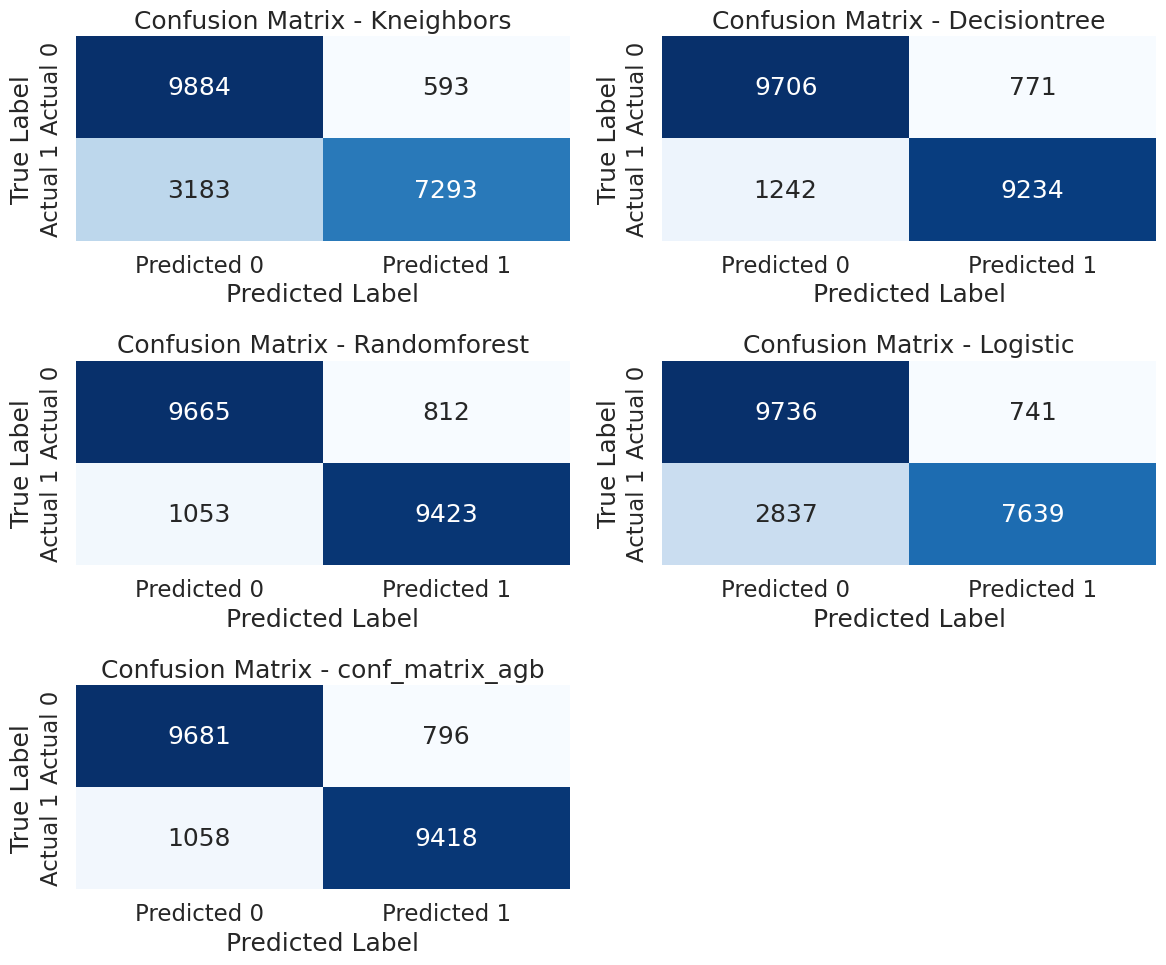

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cot and cm2 are your confusion matrices
confusion_matrices = [cm, cm2, cot, cot2,conf_matrix_agb]

model_names = ['Kneighbors', 'Decisiontree', 'Randomforest', 'Logistic','conf_matrix_agb']

# Set up the subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Iterate over the confusion matrices and plot each one
for i, (confusion_matrix, model_name) in enumerate(zip(confusion_matrices, model_names)):
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'], ax=axes.flatten()[i])

    axes.flatten()[i].set_title(f'Confusion Matrix - {model_name}')
    axes.flatten()[i].set_xlabel('Predicted Label')
    axes.flatten()[i].set_ylabel('True Label')

# Hide the empty subplot if the number of models is odd
if len(confusion_matrices) % 2 != 0:
    axes.flatten()[-1].axis('off')

plt.tight_layout()
plt.show()

In [53]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [54]:
df_test

,id,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,165034,15773898,Lucchese,586,0,23.0,2,0.00,2,0.0,1.0,160976.75,1.0,0.0,0.0
1,165035,15782418,Nott,683,0,46.0,2,0.00,1,1.0,0.0,72549.27,1.0,0.0,0.0
2,165036,15807120,K?,656,0,34.0,7,0.00,2,1.0,0.0,138882.09,1.0,0.0,0.0
3,165037,15808905,O'Donnell,681,1,36.0,8,0.00,1,1.0,0.0,113931.57,1.0,0.0,0.0
4,165038,15607314,Higgins,752,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0.0,0.0,1.0
110019,275053,15774133,Cox,575,0,36.0,4,178032.53,1,1.0,1.0,42181.68,1.0,0.0,0.0
110020,275054,15728456,Ch'iu,712,1,31.0,2,0.00,2,1.0,0.0,16287.38,1.0,0.0,0.0
110021,275055,15687541,Yegorova,709,0,32.0,3,0.00,1,1.0,1.0,158816.58,1.0,0.0,0.0


In [55]:
df_test.drop(['Surname','CustomerId','id'],axis=1,inplace=True)

In [56]:
agb.predict_proba(df_test)[:,1]

array([0.03697234, 0.9173238 , 0.04976018, ..., 0.11046719, 0.25320357,
       0.99210316], dtype=float32)

In [57]:
preds = agb.predict_proba(df_test)[:, 1]
preds[:10]
preds.shape

(110023,)

In [58]:
submission['Exited'] = np.round_(preds,1)

submission.to_csv('Submission.csv', index=False)

In [59]:
submission

,id,Exited
0,165034,0.0
1,165035,0.9
2,165036,0.0
3,165037,0.4
4,165038,1.0
...,...,...
110018,275052,1.0
110019,275053,1.0
110020,275054,0.1
110021,275055,0.3


# Summary Of All Algorithms
**Comparing all the models is an important steps in fields like finance where identyfing key cases like fraud, customers rentention rate is important. In this scenerios missing positive cases has consequences hence it always high priority to identify fraud cases and also know the retention rate of customers (Churn rate).

After carefully reviewing all the modelS, RandomForest and XGBoost has the lowest risk of type 2 error, where false negative occur. Recall ehich is the ability to capture positive instance are inversely related to type 2 error. Higher recall connotes lower Type 2 error.

Focussing on accuracy and Type 2 error XGboost stands out with lower rate of type 2 error (False negative) and high accuracy rate, **